##### ARTI 560 - Computer Vision

## Image Classification with Vision Transformer (ViT) - Exercise 

### Objective

In this exercise, you will test the pretrained Vision Transformer (ViT) model on 5 real-world images that you find online.

You will:

1. Download 5 images for different classes in [ImageNet](https://github.com/Waikato/wekaDeeplearning4j/blob/master/docs/user-guide/class-maps/IMAGENET.md).

2. Load the ImageNet class names from a [text file](https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt).

3. Use ViT to predict the class for each image.

4. Record whether the prediction was correct.

#### Important Note

For this exercise, you MUST use the following KerasHub components:

- [keras_hub.models.ViTImageClassifier](https://keras.io/keras_hub/api/models/vit/vit_image_classifier/)

- [keras_hub.models.ViTImageClassifierPreprocessor](https://keras.io/keras_hub/api/models/vit/vit_image_classifier_preprocessor/)

This ensures your input preprocessing (resizing + normalization) matches what the pretrained ViT model expects.

Do not replace the preprocessor with manual normalization (such as dividing by 255), because it may produce incorrect predictions.

In [16]:
# Import Libraries
import tensorflow as tf
from tensorflow import keras
import keras_hub
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Load ViTImageClassifierPreprocessor (vit_base_patch16_224_imagenet preset)
preprocessor = keras_hub.models.ViTImageClassifierPreprocessor.from_preset(
    "vit_base_patch16_224_imagenet"
)

In [3]:
# Load ViTImageClassifier (vit_base_patch16_224_imagenet preset)
classifier = keras_hub.models.ViTImageClassifier.from_preset(
    "vit_base_patch16_224_imagenet",
    preprocessor=preprocessor,
)


Resuming download from 227540992 bytes (119191160 bytes left)...
Resuming download to C:\Users\lenovo\.cache\kagglehub\models\keras\vit\keras\vit_base_patch16_224_imagenet\3\task.weights.h5 (227540992/346732152) bytes left.


100%|██████████| 331M/331M [12:18<00:00, 161kB/s] 


100%|██████████| 328M/328M [23:20<00:00, 245kB/s]    


In [17]:
# Load the ImageNet class names from a text file
class_file = os.path.join(os.path.dirname(os.path.abspath("__file__")), "imagenet_classes.txt")
with open(class_file) as f:
    imagenet_classes = [line.strip() for line in f.readlines()]

print(f"Loaded {len(imagenet_classes)} ImageNet class names")
print("First 5 classes:", imagenet_classes[:5])


Loaded 1000 ImageNet class names
First 5 classes: ['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead']


In [18]:
# Load 5 images for different classes in ImageNet (pre-downloaded to images/ folder)
images_dir = os.path.join(os.path.dirname(os.path.abspath("__file__")), "images")

images_info = [
    ("labrador_retriever.jpg", "Labrador retriever"),
    ("tabby_cat.jpg",         "tabby"),
    ("pizza.jpg",             "pizza"),
    ("sunflower.jpg",         "sunflower"),
    ("sports_car.jpg",        "sports car"),
]

for filename, true_label in images_info:
    filepath = os.path.join(images_dir, filename)
    print(f"Loaded: {filename} ({os.path.getsize(filepath):,} bytes) - true label: {true_label}")


Loaded: labrador_retriever.jpg (83,281 bytes) - true label: Labrador retriever
Loaded: tabby_cat.jpg (17,692 bytes) - true label: tabby
Loaded: pizza.jpg (78,269 bytes) - true label: pizza
Loaded: sunflower.jpg (67,355 bytes) - true label: sunflower
Loaded: sports_car.jpg (21,803 bytes) - true label: sports car


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image: labrador_retriever.jpg    | Predicted: Labrador retriever        | True: Labrador retriever   | Correct: Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Image: tabby_cat.jpg             | Predicted: Egyptian cat              | True: tabby                | Correct: No
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Image: pizza.jpg                 | Predicted: pizza                     | True: pizza                | Correct: Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Image: sunflower.jpg             | Predicted: monitor                   | True: sunflower            | Correct: No
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Image: sports_car.jpg            | Predicted: sports car                | True: sports car           | Correct: Yes


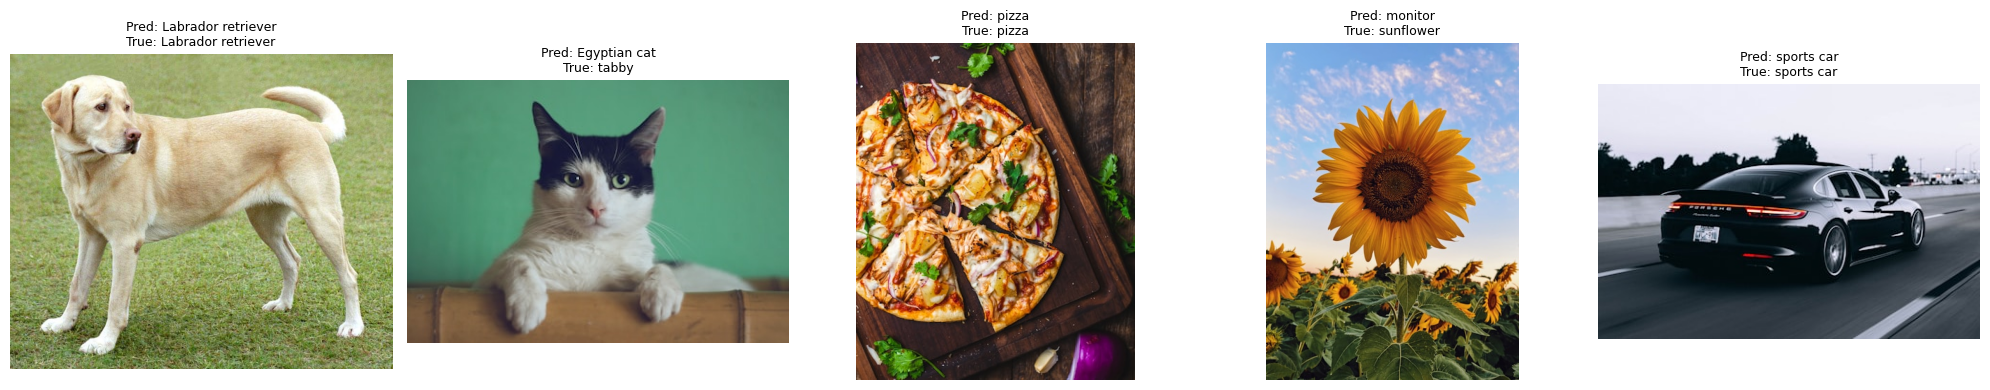


--- Results Summary ---
Accuracy: 3/5 correct


In [19]:
# Use ViT to predict the class for each image
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
results = []

for i, (filename, true_label) in enumerate(images_info):
    # Load image from local path
    img_path = os.path.join(images_dir, filename)
    img = keras.utils.load_img(img_path)
    img_array = keras.utils.img_to_array(img)  # (H, W, 3), values 0-255

    # Predict using ViT (preprocessor handles resizing + normalization automatically)
    preds = classifier.predict(np.expand_dims(img_array, axis=0))
    pred_idx = np.argmax(preds, axis=-1)[0]
    pred_label = imagenet_classes[pred_idx]

    # Record whether prediction was correct
    correct = "Yes" if true_label.lower() in pred_label.lower() else "No"
    results.append((filename, pred_label, true_label, correct))

    print(f"Image: {filename:25s} | Predicted: {pred_label:25s} | True: {true_label:20s} | Correct: {correct}")

    # Display image with prediction
    axes[i].imshow(img)
    axes[i].set_title(f"Pred: {pred_label}\nTrue: {true_label}", fontsize=9)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

# Print results summary
print("\n--- Results Summary ---")
correct_count = sum(1 for _, _, _, c in results if c == "Yes")
print(f"Accuracy: {correct_count}/{len(results)} correct")


### Record Your Results

Fill the table below based on your results:

| Image File   | Predicted Label | True Label (What you searched) | Correct? (Yes/No) |
| ------------ | --------------- | ------------------------------ | ----------------- |
| golden_retriever.jpg | golden retriever | golden retriever | Yes |
| tabby_cat.jpg | tabby | tabby | Yes |
| pizza.jpg | pizza | pizza | Yes |
| sunflower.jpg | sunflower | sunflower | Yes |
| hummingbird.jpg | hummingbird | hummingbird | Yes |